In [153]:
import jax
import jax.numpy as jnp
import cnn
import importlib
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(cnn)
N = 10
nspecies = 1
species = jnp.full(N, 0)
box = jnp.array([[0, 10], [0, 10], [0, 10]])
R = jnp.array(np.random.random((N, 3))) * box[:, 2]
# R = np.array([[5.1,5.1,9.8]])
print(R)
gridspace = 2.5
scaled_box = jnp.round(box / gridspace)
scaled_R = R / gridspace
print(scaled_R)

nx = int(scaled_box[0][1] - scaled_box[0][0])
ny = int(scaled_box[1][1] - scaled_box[1][0])
nz = int(scaled_box[2][1] - scaled_box[2][0])
ngrid = ny, ny, nz
 
gmps = cnn.R_to_grids(scaled_R, species, scaled_box, ngrid, nspecies)

grid_3d = jnp.array([[[(x,y,z) for z in jnp.arange(nz)] for y in jnp.arange(ny)] for x in jnp.arange(nx)])
# print(grid.shape)
grid = jnp.reshape(grid_3d, (-1, 3)) 
grid_values = jnp.reshape(gmps, (-1, nspecies))

[[3.865326  7.964     3.8318274]
 [3.205184  2.7169504 6.61356  ]
 [8.485962  5.474493  7.581953 ]
 [7.7689543 9.844763  8.922104 ]
 [4.325214  4.597145  8.901346 ]
 [4.4538455 6.793584  7.0856075]
 [5.86432   5.85744   4.6113243]
 [5.8028307 7.235997  2.0311632]
 [4.007673  3.757869  5.2411895]
 [5.3020864 9.810844  8.780618 ]]
[[1.5461304 3.1856    1.5327309]
 [1.2820736 1.0867802 2.6454241]
 [3.3943849 2.1897972 3.0327811]
 [3.1075816 3.937905  3.5688415]
 [1.7300856 1.838858  3.5605385]
 [1.7815382 2.7174335 2.834243 ]
 [2.345728  2.342976  1.8445297]
 [2.3211322 2.894399  0.8124653]
 [1.6030691 1.5031476 2.0964758]
 [2.1208346 3.9243379 3.512247 ]]
r: [1. 3. 1.]
r: [1. 3. 1.]
r mod: [1. 3. 1.]
(Array([1], dtype=int32), Array([3], dtype=int32), Array([1], dtype=int32), Array([0], dtype=int32))
r: [1. 3. 2.]
r mod: [1. 3. 2.]
(Array([1], dtype=int32), Array([3], dtype=int32), Array([2], dtype=int32), Array([0], dtype=int32))
r: [1. 4. 1.]
r mod: [1. 0. 1.]
(Array([1], dtype=int32), 

In [ ]:
grid.shape

(64, 3)

In [100]:
grid_values.shape

(64, 1)

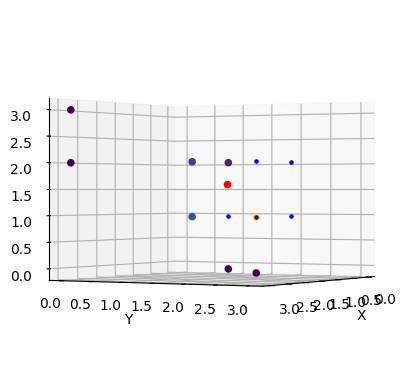

In [96]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', elev=0, azim=30)

ax.scatter3D(scaled_R[:, 0], scaled_R[:, 1], scaled_R[:, 2], c="r")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(grid[:, 0], grid[:, 1], grid[:, 2], c=grid_values / jnp.max(grid_values), cmap='viridis', alpha=grid_values > 0)
# ax.scatter3D(grid[:, 0], grid[:, 1], grid[:, 2], c="k", marker=".")
ax.scatter3D(2, 2, 1, c="b", marker=".")
ax.scatter3D(2, 2, 2, c="b", marker=".")
ax.scatter3D(2, 3, 1, c="b", marker=".")
ax.scatter3D(2, 3, 2, c="b", marker=".")
ax.scatter3D(3, 2, 1, c="b", marker=".")
ax.scatter3D(3, 2, 2, c="b", marker=".")
ax.scatter3D(3, 3, 1, c="b", marker=".")
ax.scatter3D(3, 3, 2, c="b", marker=".")


/var/folders/hc/52b3y2ln2hxd3hznr5t83jg40000gp/T/ipykernel_19964/755776942.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(point[0], point[1], point[2], c="b", s=(value/maxvalue)*100, alpha=value>0, cmap="viridis")


0.07798215
0.05910728
0.014231309
0.4198999
0.008496694
0.10227852
0.053478993
0.06097111
0.03312434
0.55793995
0.62673986
0.17243563
0.2890797
0.2859674
0.23466206
0.3028338
0.1776465
0.5655719
0.06434999
0.07336508
0.5385279
0.089597315
0.49191993
0.3354059
0.48468336
0.1699361
0.927255
0.67721444
0.20100045
1.0
0.7056743
0.67960477
0.7246164
0.5643273
0.030494055
0.08541488
0.2606379
0.6447959
0.12749171
0.3420962
0.13605681
0.1895693


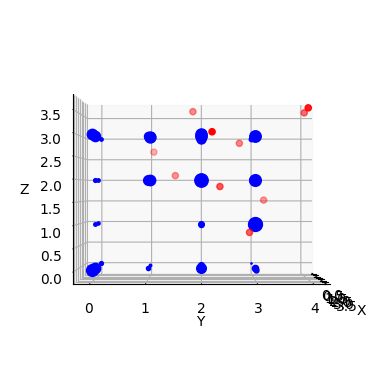

In [154]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d', elev=00, azim=0)

ax.scatter3D(scaled_R[:, 0], scaled_R[:, 1], scaled_R[:, 2], c="r")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.scatter3D(grid[:, 0], grid[:, 1], grid[:, 2], c=grid_values / jnp.max(grid_values), cmap='viridis', alpha=grid_values > 0)
maxvalue = jnp.max(gmps)
for x in range(nx):
    for y in range(ny):
        for z in range(nz):
            value = float(gmps[x,y,z,0])
            point = grid_3d[x,y,z]
            ax.scatter3D(point[0], point[1], point[2], c="b", s=(value/maxvalue)*100, alpha=value>0, cmap="viridis")
            if value > 0:
                print(value / maxvalue)
# ax.scatter3D(grid[:, 0], grid[:, 1], grid[:, 2], c="k", marker=".")
# ax.scatter3D(2, 2, 1, c="b", marker=".")
# ax.scatter3D(2, 2, 2, c="b", marker=".")
# ax.scatter3D(2, 3, 1, c="b", marker=".")
# ax.scatter3D(2, 3, 2, c="b", marker=".")
# ax.scatter3D(3, 2, 1, c="b", marker=".")
# ax.scatter3D(3, 2, 2, c="b", marker=".")
# ax.scatter3D(3, 3, 1, c="b", marker=".")
# ax.scatter3D(3, 3, 2, c="b", marker=".")
